In [1]:
import numpy as np
import pandas as pd

import torch 
from torch import nn
import torch.nn.functional as F

# Import torchvision
import torchvision
from torchvision import datasets 
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.1.2
0.16.2


In [2]:
# Getting a computer vision dataset
train_data = torchvision.datasets.FashionMNIST(
    root = "data", # where to download it
    train=True, # do we want the training dataset ?
    download = True, # do we want to download it, yes or no ?
    transform = torchvision.transforms.ToTensor(),
    target_transform = None # How do we want to transform the data
)

test_data = torchvision.datasets.FashionMNIST(
    root="data", train = False, download = True, transform = torchvision.transforms.ToTensor(), target_transform = None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the training example 
image, label = train_data[0]

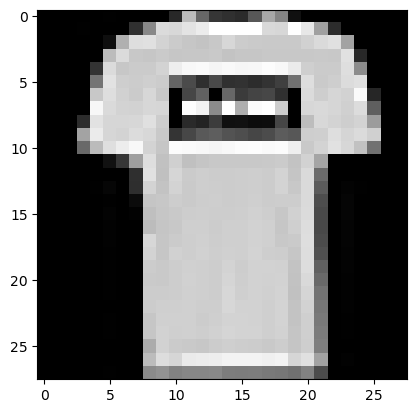

In [5]:
plt.imshow(np.transpose(np.array(train_data[1][0]),(1,2,0)),cmap="gray")

In [6]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image 
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [9]:
# 1.2 Visualizing our data

In [10]:
import matplotlib.pyplot as plt

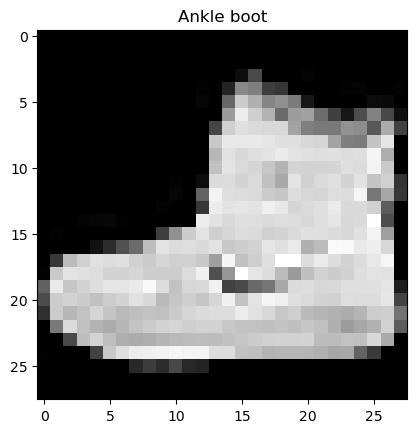

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

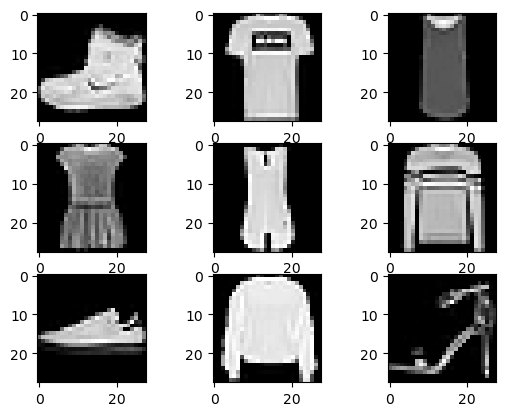

In [12]:
fig, ax = plt.subplots(nrows=3,ncols=3)
ax[0][0].imshow(np.transpose(np.array(train_data[0][0]),(1,2,0)),cmap="gray")
ax[0][1].imshow(np.transpose(np.array(train_data[1][0]),(1,2,0)),cmap="gray")
ax[0][2].imshow(np.transpose(np.array(train_data[2][0]),(1,2,0)),cmap="gray")
ax[1][0].imshow(np.transpose(np.array(train_data[3][0]),(1,2,0)),cmap="gray")
ax[1][1].imshow(np.transpose(np.array(train_data[4][0]),(1,2,0)),cmap="gray")
ax[1][2].imshow(np.transpose(np.array(train_data[5][0]),(1,2,0)),cmap="gray")
ax[2][0].imshow(np.transpose(np.array(train_data[6][0]),(1,2,0)),cmap="gray")
ax[2][1].imshow(np.transpose(np.array(train_data[7][0]),(1,2,0)),cmap="gray")
ax[2][2].imshow(np.transpose(np.array(train_data[8][0]),(1,2,0)),cmap="gray")

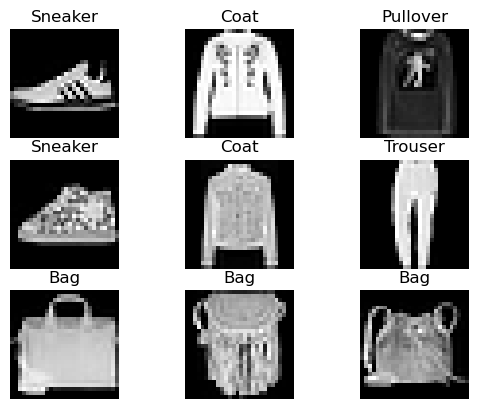

In [13]:
# Checking it randomly
fig, ax = plt.subplots(nrows=3, ncols=3)

for i in range(3):
    for j in range(3):
        index = np.random.randint(60000) # Setting the index randomly
        ax[i,j].imshow(np.transpose(np.array(train_data[index][0]),(1,2,0)), cmap="gray")
        ax[i,j].set_title(class_names[train_data[index][1]])
        ax[i,j].axis("off")

plt.show();

In [14]:
# Turn the dataset into the dataloader
from torch.utils.data import DataLoader

In [15]:
train_dataloader = DataLoader(dataset = train_data,
                             batch_size=32,
                             shuffle=True)

test_dataloader  = DataLoader(dataset = test_data,
                             batch_size = 32,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x25585af8610>,
 <torch.utils.data.dataloader.DataLoader at 0x25585930910>)

In [16]:
# Let's check out what we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of 32.")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of 32.")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000025585AF8610>, <torch.utils.data.dataloader.DataLoader object at 0x0000025585930910>)
Length of train_dataloader: 1875 batches of 32.
Length of test_dataloader: 313 batches of 32.


In [17]:
60000/32

1875.0

In [18]:
# Check what inside the training dataloader 
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape 

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: label size: torch.Size([])


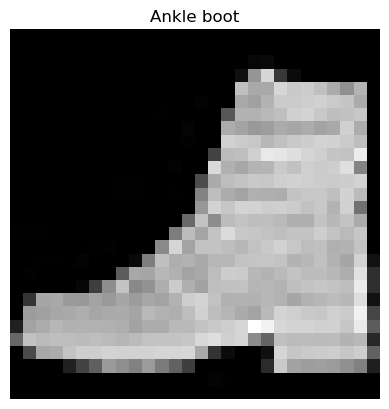

In [19]:
# Show a sample 
torch.manual_seed(1)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx] 
plt.imshow(np.transpose(np.array(img),(1,2,0)),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: label size: {label.shape}")

In [20]:
# Create a flatten layer
flatten_model = nn.Flatten()

# get a single sample 
x = train_features_batch[0]

# Flatten the sample 
output = flatten_model(x) # perform forward pass

# Print out what happened 
print(f"Shape before falttening: {x.shape} -> [color_channels, height, width] ")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before falttening: torch.Size([1, 28, 28]) -> [color_channels, height, width] 
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [21]:
train_features_batch[0].shape

torch.Size([1, 28, 28])

In [22]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, in_features=784, h1=120, h2=84, out_features=len(class_names), p=0.5):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.bn1 = nn.BatchNorm1d(h1)
        self.drop1 = nn.Dropout(p)

        self.fc2 = nn.Linear(h1, h2)
        self.bn2 = nn.BatchNorm1d(h2)
        self.drop2 = nn.Dropout(p)

        self.fc3 = nn.Linear(h2,out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = F.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.fc3(x)
        return x

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [24]:
model_0 = FashionMNISTModelV0().to(device)
model_0

FashionMNISTModelV0(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (bn1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (bn2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
# Define the loss function and the optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=1e-3)

In [26]:
# Make a function to predict the accuracy 
def accuracy_fn(y_true, y_pred):
    corr = torch.eq(y_true, y_pred).sum().item()
    acc = (corr / len(y_true)) * 100
    return acc

In [27]:
import time
# Import tqdm progress bar 
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
start_time = time.time()

# Set the number of epochs (we'll keep this small for fatser training time)
epochs = 3

# Create training and test loop
for epoch in tqdm (range(epochs)):
    print(f"Epoch: {epoch} \n----- ")
    
    ### Trianing 
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X_train,y_train) in enumerate(train_dataloader):
        model_0.train()
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 1. Forward pass
        y_pred = model_0(X_train.view(-1,28*28))

        # 2. Calculate loss(per batch)
        loss = criterion(y_pred, y_train)
        train_loss += loss.item() # accumulate training losses Later on we are going to divide it by total number of batches

        # 3. OPtimize zero grad
        optimizer.zero_grad()

        # 4. Loss Backward
        loss.backward()

        # 5. Optimizer Step 
        optimizer.step()

        # Print out what's happening
        if batch%400 == 0:
            print(f"Looked at {batch * len(X_train)} / {len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader 
    train_loss = train_loss / len(train_dataloader)  # Averaging the data loss across the batches

    ## Testing loop 
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. Forward pass
            y_val = model_0(X_test.view(-1,28*28))

            # 2. Calculate loss (accumulatively)
            test_loss += criterion(y_val, y_test)

            # 3. Calculate Accuracy
            test_acc += accuracy_fn(y_test, y_val.argmax(axis=1))

        # Calculate the test loss average per batch 
        test_loss = test_loss / len(test_dataloader)

        # Calculate the test acc per batch 
        test_acc = test_acc / len(test_dataloader)

    # Print out what's happening 
    print(f"\n Training loss: {test_loss:.4f}, Test acc: {test_acc: .4f} ")

# Calculate training time
end_time = time.time()
total_train_time_model_0 = end_time - start_time

C:\Users\utkri\anaconda3\envs\pytorch_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----- 
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 33%|███▎      | 1/3 [00:12<00:25, 12.71s/it]


 Training loss: 0.4386, Test acc:  84.2252 
Epoch: 1 
----- 
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 67%|██████▋   | 2/3 [00:25<00:12, 12.96s/it]


 Training loss: 0.4093, Test acc:  85.3834 
Epoch: 2 
----- 
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


100%|██████████| 3/3 [00:38<00:00, 12.83s/it]


 Training loss: 0.3927, Test acc:  85.5531 


Making a function to evaluate the performance.

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               view_shape=None):
    """
    Returns a dictionary containing the results of the model predicting on data_loader.
    
    Args:
    model (torch.nn.Module): The model to evaluate.
    data_loader (torch.utils.data.DataLoader): The data loader with evaluation data.
    loss_fn (torch.nn.Module): The loss function.
    accuracy_fn: The accuracy function.
    view_shape (tuple, optional): Shape to reshape input tensors if required by the model.
    
    Returns:
    dict: A dictionary with model name, loss, and accuracy.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Reshape input tensor if view_shape is provided
            if view_shape:
                X = X.view(view_shape)
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(axis=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss = loss / len(data_loader)
        acc = acc / len(data_loader)

    return {"model_name": model.__class__.__name__,  # Only works when model was created with the class
            "model_loss": loss.item(),
            "model_acc": acc}

# Example accuracy function
def accuracy_fn(y_true, y_pred):
    return (y_true == y_pred).sum().item() / len(y_true)

# Calculate model results on the datasets
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=criterion,
                             accuracy_fn=accuracy_fn,
                             view_shape=(-1, 28*28))


model_0_results